# Engima Day 2 - Regression

Your previous endeavours bore fruit. With your help, the investigators have traced the products identified as counterfeit, and they have narrowed it down to what they believe are the Mafia owned factories. You have been given data collected by these investigators. You must come up with a way to show that the profits earned far exceed the ideal profit earned by a company creating original products, considering the use of high-quality raw material. Use the data from the other factories to predict the ideal profit to prove the fraudulence of these companies.

You need to predict the ideal profit earned by each factory showing the discrepancy, giving you the evidence to shut down the Mafia operations.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Regression_Data.csv')

In [3]:
data.head()

,Area (km^2),Investigated Before,Distance to port,24Hr Power,Location,Cost
0,2.889,yes,46.648901,no,Location 3,62.488175
1,1.000,yes,45.536261,no,Location 2,12.560815
2,2.833,no,51.610558,no,Location 3,24.386175
3,3.111,yes,59.525692,no,Location 1,27.359963
4,3.556,yes,45.608195,no,Location 2,35.223461


In [4]:
data.columns

Index(['Area (km^2)', 'Investigated Before', 'Distance to port', '24Hr Power',
       'Location', 'Cost'],
      dtype='object')

In [5]:
data.dtypes

Area (km^2)            float64
Investigated Before     object
Distance to port       float64
24Hr Power              object
Location                object
Cost                   float64
dtype: object

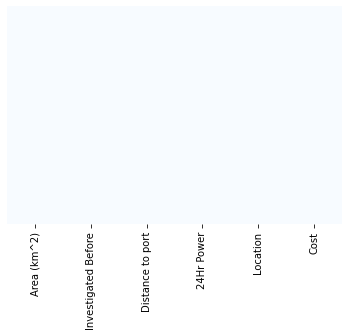

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# checking for missing/ null values
sns.heatmap(data.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=data.columns)

In [7]:
y = data.Cost
X = data.drop(['Cost'], axis=1)

In [8]:
# splitting the dataset as per the instructions given
X_train_full = X[:200]
X_valid_full = X[200:]

y_train = y[:200]
y_valid = y[200:]

In [9]:
# selecting the categorical columns with relatively low cardinality
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and  X_train_full[cname].dtype == "object"]

In [10]:
# selecting the numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [11]:
# keeping the selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

# preprocessing for numerical data
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='constant')),
    ('scaler', RobustScaler())
])

# preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
      ])

In [13]:
from sklearn.ensemble import RandomForestRegressor

# defining the model
rfr = RandomForestRegressor(max_depth = 6, random_state=7)

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('rfr', rfr)
                             ])

# preprocessing of training data, fitting the model 
my_pipeline.fit(X_train, y_train)

# preprocessing of validation data, getting predictions
preds = my_pipeline.predict(X_valid)

# evaluating the model
score = sqrt(mean_squared_error(y_valid, preds))
print('RMSE:', score)

RMSE: 6.11446335668914


Final Score: 6.11 RMSE